### Unidad II. Regresiones y reducción de dimensionalidad.

## Reducción de datos. 

- Análisis de correspondencia.


### [Análisis de componentes principales (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [1]:
using RDatasets
iris = dataset("datasets","iris")
head(iris, 5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [2]:
using Plots
pyplot(size=(300,300))

Plots.PyPlotBackend()

[Plots.jl] Initializing backend: pyplot



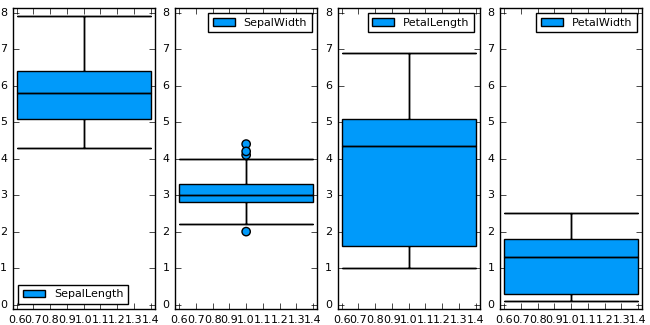

In [3]:
iris[:dummy] = 1
cols = [:SepalLength, :SepalWidth, :PetalLength, :PetalWidth]
boxplot(iris, :dummy, cols, 
layout=grid(1,4), link=:y, xlab="", linecolor=:black, size=(650,325), grid=false)

> In general, the data table will be preprocessed
before the analysis. **Almost always, the columns of X
will be centered so that the mean of each column
is equal to 0** (i.e., X'1 = 0, where 0 is a J by
1 vector of zeros and 1 is an I by 1 vector of
ones). If in addition, each element of X is divided
by √I (or √I − 1), the analysis is referred to as
a covariance PCA because, in this case, the matrix
X'X is a covariance matrix. **In addition to centering,
when the variables are measured with different units,
it is customary to standardize each variable to unit
norm.** This is obtained by dividing each variable by
its norm (i.e., the square root of the sum of all the
squared elements of this variable). In this case, the
analysis is referred to as a correlation PCA because,
then, the matrix X'X is a correlation matrix (most
statistical packages use correlation preprocessing as a
default).
>> *Abdi, Hervé, and Lynne J. Williams. "Principal component analysis." Wiley Interdisciplinary Reviews: Computational Statistics 2.4 (2010): 433-459.*

In [4]:
for i in 1:4
    col = iris[:,i]
    iris[:,i] = (col .- mean(col))./sqrt(sumabs2(col))
end


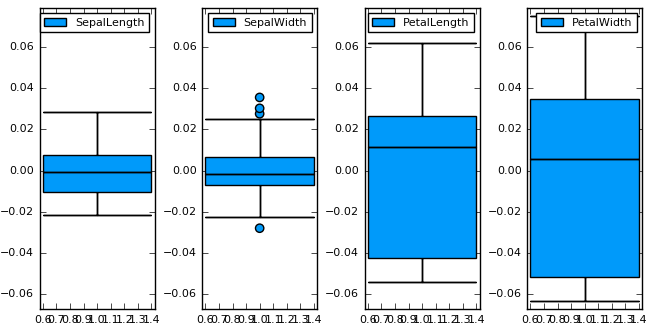

In [5]:
boxplot(iris, :dummy, cols, 
layout=grid(1,4), link=:y, xlab="", linecolor=:black, size=(650,325), grid=false)

In [6]:
using MultivariateStats

> [**MultivariateStats.jl**](http://multivariatestatsjl.readthedocs.io/en/latest/) is a Julia package for multivariate statistical analysis.  
All methods implemented in this package adopt the column-major convention of JuliaStats: **in a data matrix, each column corresponds to a sample/observation, while each row corresponds to a feature (variable or attribute).**

In [7]:
data_matrix = convert(Matrix{Float64}, iris[:,1:4])' 

4x150 Array{Float64,2}:
 -0.0102846  -0.0130518   -0.0158189   …  0.00493477   0.000784029
  0.0117044  -0.00151593   0.00377219     0.00906031  -0.00151593 
 -0.0463987  -0.0463987   -0.0483664      0.0323099    0.0264067  
 -0.0574738  -0.0574738   -0.0574738      0.0633017    0.0345456  

In [8]:
pca = fit(PCA, data_matrix, pratio=1.0)

PCA(indim = 4, outdim = 4, principalratio = 1.00000)

In [9]:
pc = projection(pca)

4x4 Array{Float64,2}:
  0.172924   -0.269406  -0.539083    0.779042
 -0.0816342  -0.940447  -0.0309746  -0.328536
  0.607533    0.141995  -0.599895   -0.500866
  0.770932   -0.151054   0.590386    0.185175

In [10]:
varianza = principalvars(pca)

4-element Array{Float64,1}:
 0.00318894 
 0.000124555
 6.65315e-5 
 1.24055e-5 

In [11]:
sqrt(varianza)

4-element Array{Float64,1}:
 0.0564707 
 0.0111604 
 0.00815668
 0.00352215

In [12]:
100 * varianza ./ sum(varianza) # % varianza

4-element Array{Float64,1}:
 94.0016  
  3.67155 
  1.96117 
  0.365682

In [13]:
points = transform(pca, data_matrix)'

150x4 Array{Float64,2}:
 -0.0752311  -0.00614334   -0.000915643   0.000739366
 -0.0746304   0.00703514    0.00098558    0.00292697 
 -0.076736    0.00252802    0.00349394    1.94601e-5 
 -0.0743685   0.00594618    0.00196085   -0.00216086 
 -0.0756862  -0.0082572    -0.000251676  -0.00120717 
 -0.0629228  -0.0181072    -0.000231227  -0.000328423
 -0.0717777  -0.00266176    0.00629102   -0.00271632 
 -0.074059   -0.0030046    -0.0012683    -0.000455396
 -0.0756108   0.0113855     0.0047968    -0.0015937  
 -0.0780846   0.00569669   -0.00367218    7.75785e-6 
 -0.0737496  -0.0119554    -0.00449746    0.00125007 
 -0.0733421  -0.0019797    -0.000956994  -0.0035967  
 -0.0793034   0.00827662   -0.00166399    0.00078412 
  ⋮                                                  
  0.0395875  -0.00146516    0.00697369   -0.00168586 
  0.0619991  -0.00823626    0.00328278    0.00442786 
  0.0772128  -0.00953819    0.0126        0.00349595 
  0.0672803  -0.010812      0.0136149     0.00951451 
  0.


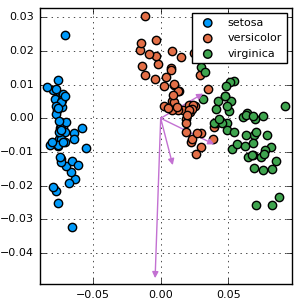

In [14]:
scatter(points[:,1], points[:,2], group=iris[:Species])

scale = 0.05

segs_x = Segments()
segs_y = Segments()
for i in 1:4
    push!(segs_x, [ 0, pc[i,1]*scale])
    push!(segs_y, [ 0, pc[i,2]*scale])
end
plot!(segs_x.pts, segs_y.pts, arrow=true, label="")


#### [PCA en R](http://www.sthda.com/english/wiki/principal-component-analysis-in-r-prcomp-vs-princomp-r-software-and-data-mining)

In [15]:
using RCall
R"""
pca <- prcomp(t($data_matrix))#, cor=TRUE
"""

RCall.RObject{RCall.VecSxp}
Standard deviations:
[1] 0.056470702 0.011160407 0.008156682 0.003522147

Rotation:
             PC1        PC2         PC3        PC4
[1,]  0.17292425 -0.2694060  0.53908304  0.7790424
[2,] -0.08163417 -0.9404470  0.03097456 -0.3285359
[3,]  0.60753291  0.1419948  0.59989506 -0.5008664
[4,]  0.77093244 -0.1510539 -0.59038629  0.1851754


In [16]:
R"summary(pca)"

RCall.RObject{RCall.VecSxp}
Importance of components:
                           PC1     PC2      PC3      PC4
Standard deviation     0.05647 0.01116 0.008157 0.003522
Proportion of Variance 0.94002 0.03672 0.019610 0.003660
Cumulative Proportion  0.94002 0.97673 0.996340 1.000000


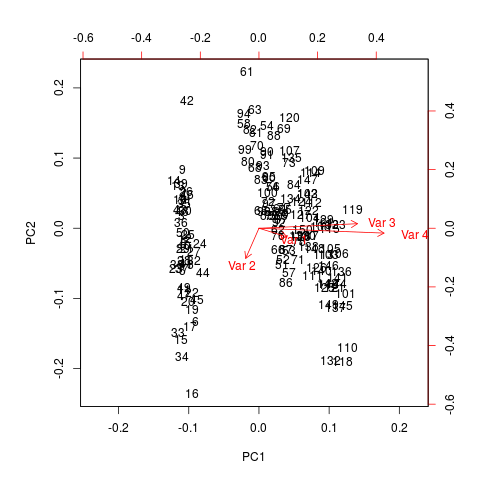

RCall.RObject{RCall.NilSxp}
NULL


In [17]:
R"biplot(pca)"

### [Análisis de correspondencia (CA)](https://en.wikipedia.org/wiki/Correspondence_analysis)

> Distribution of hair and eye color and sex in 592 statistics students.  
> A 3-dimensional array resulting from cross-tabulating 592
> observations on 3 variables.  The variables and their levels are
> as follows:  
```
 No  Name  Levels                    
  1  Hair  Black, Brown, Red, Blond  
  2  Eye   Brown, Blue, Hazel, Green  
  3  Sex   Male, Female              
```   
> The Hair x Eye table comes rom a survey of students at the
> University of Delaware reported by Snee (1974).  The split by
> ‘Sex’ was added by Friendly (1992a) for didactic purposes.

In [18]:
using RCall
R"""
data("HairEyeColor")
HairEyeColor
"""

RCall.RObject{RCall.RealSxp}
, , Sex = Male

       Eye
Hair    Brown Blue Hazel Green
  Black    32   11    10     3
  Brown    53   50    25    15
  Red      10   10     7     7
  Blond     3   30     5     8

, , Sex = Female

       Eye
Hair    Brown Blue Hazel Green
  Black    36    9     5     2
  Brown    66   34    29    14
  Red      16    7     7     7
  Blond     4   64     5     8



In [19]:
R"""
HairEye <- margin.table(HairEyeColor,1:2)
"""

RCall.RObject{RCall.RealSxp}
       Eye
Hair    Brown Blue Hazel Green
  Black    68   20    15     5
  Brown   119   84    54    29
  Red      26   17    14    14
  Blond     7   94    10    16


> 1. Correspondence analysis is applicable to a **table of nonnegative data**, the primary example being a 
cross-tabulation of two categorical variables, that is a
contingency table.
2. The method can be thought of as an **analysis of row or column profiles** of the data matrix—these are 
the rows or columns expressed relative to their marginal totals.
3. Each profile receives a **weight** equal to the relative **marginal total**, called a **mass**.
4. **Distances between profiles are defined by the chi-square metric.** This is essentially a type of 
standardization of the profile values similar to that used in PCA, but using the average profile 
element as an estimate of variance rather than the variance itself.
5. The **total variance**, called **inertia**, in the data is numerically equal to the **chi-square statistic 
for the table divided by the table's grand total**.
>> - *Greenacre, Michael J. Biplots in practice. Fundacion BBVA, 2010.*

In [20]:
R"""
# install.packages("ca")
library(ca)
CA <- ca(HairEye)
"""

RCall.RObject{RCall.VecSxp}

 Principal inertias (eigenvalues):
           1        2        3       
Value      0.208773 0.022227 0.002598
Percentage 89.37%   9.52%    1.11%   


 Rows:
            Black     Brown       Red    Blond
Mass     0.182432  0.483108  0.119932 0.214527
ChiDist  0.551192  0.159461  0.354770 0.838397
Inertia  0.055425  0.012284  0.015095 0.150793
Dim. 1  -1.104277 -0.324463 -0.283473 1.828229
Dim. 2   1.440917 -0.219111 -2.144015 0.466706


 Columns:
            Brown     Blue     Hazel     Green
Mass     0.371622 0.363176  0.157095  0.108108
ChiDist  0.500487 0.553684  0.288654  0.385727
Inertia  0.093086 0.111337  0.013089  0.016085
Dim. 1  -1.077128 1.198061 -0.465286  0.354011
Dim. 2   0.592420 0.556419 -1.122783 -2.274122


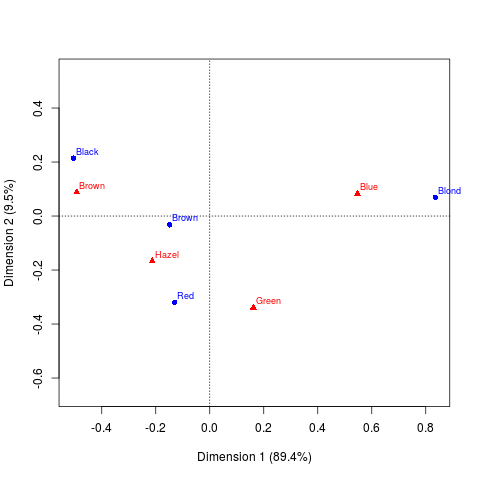

RCall.RObject{RCall.VecSxp}
$rows
            Dim1        Dim2
Black -0.5045624  0.21482046
Brown -0.1482527 -0.03266635
Red   -0.1295233 -0.31964240
Blond  0.8353478  0.06957934

$cols
            Dim1        Dim2
Brown -0.4921577  0.08832151
Blue   0.5474139  0.08295428
Hazel -0.2125969 -0.16739109
Green  0.1617534 -0.33903957



In [21]:
R"plot(CA)"

> Row points (column points) that are closer together have more similar column profiles (row profiles). Keep in mind that you can not interpret the distance between row and column points directly.
>> [Quick-R](http://www.statmethods.net/advstats/ca.html)

> Possibly the simplest way to determine the relationship between a **row (column) level** and a
**column (row) level** is to draw lines from their corresponding points in the plot to the origin. If the
angle between the two lines is *acute*, then the **column (row) level** occurs more often in the sample
than it does on average in the  **rows (columns)** as a whole. 
>> *Yelland, Phillip M. "An introduction to correspondence analysis." The Mathematica Journal 12 (2010): 1-23*